In [63]:
import numpy as np
import matplotlib as plt 
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

#to display all columns we use the below code
pd.set_option('display.max_columns', None)

In [286]:
#Since data is in form of excel file we have to use pandas read_excel to load the data
df = pd.read_excel('Data_Train.xlsx')

In [287]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [288]:
#check whether there is null value in the dataset
df.isnull().sum().max()

1

In [289]:
#there is only one null value so we drop
df.dropna(inplace=True)

In [290]:
#the size of the dataset
df.shape

(10682, 11)

In [291]:
#now let's analyze, understand and clean our data
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [292]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\fistum graceful\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

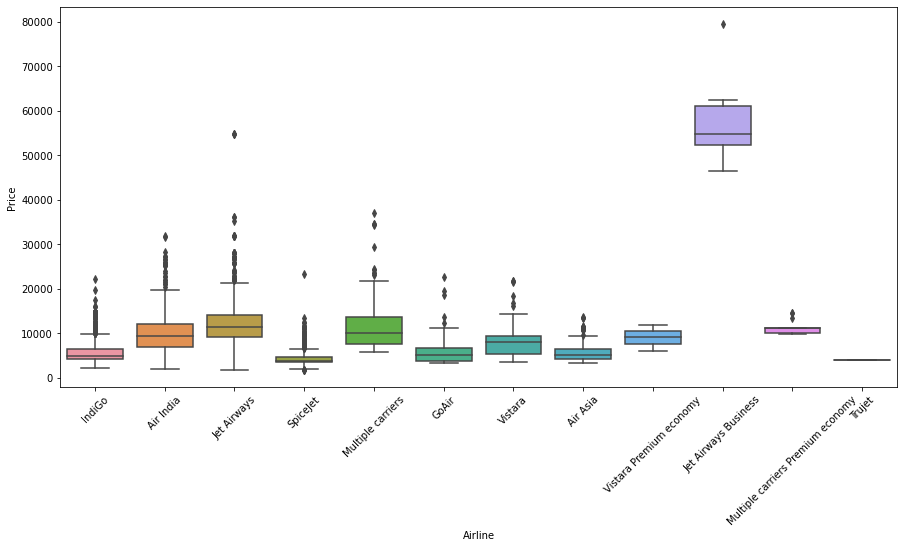

In [293]:
plt.rcParams["figure.figsize"] = (15,7)
sns.boxplot( df['Airline'], df['Price'])
plt.xticks(rotation=45)

In [294]:
# From graph we can see that Jet Airways Business have the highest Price. 
# Apart from Jet Airways Business almost all are having similar median 
# since Jet Airways Business is an outlier so we drop these row
df = df.loc[df["Airline"] != 'Jet Airways Business']

In [295]:
df.shape

(10676, 11)

From description we can see that Date_of_Journey is a object data type,\ Therefore, 
we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [296]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [297]:
# since it's a one year dataset(2019) we don't need to extract for a year from Date_of_Journey column

In [298]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [299]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [300]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [301]:
df['Source'].value_counts()

Delhi       4534
Kolkata     2871
Banglore    2193
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [302]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [303]:
# as we can see from the dataset we recognize one thing that source, destination, total stops are related with route
# so we don't need column 'route' the rest express these column so we drop these column also 

In [304]:
df.drop('Route',axis=1, inplace=True)

In [305]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [306]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [307]:
# we will do similar thing for Arrival_Time also

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [308]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [309]:
#let's analyze & clean 'Duration'
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [310]:
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [311]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [312]:
df.drop(["Duration"], axis = 1, inplace = True)

In [313]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [314]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [315]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [316]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [317]:
df['Additional_Info'].head()

0    No info
1    No info
2    No info
3    No info
4    No info
Name: Additional_Info, dtype: object

In [318]:
# Additional_Info contains almost 80% no_info
#we drop 'Additional_Info' column
df.drop('Additional_Info',axis=1, inplace=True)

C:\Users\fistum graceful\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

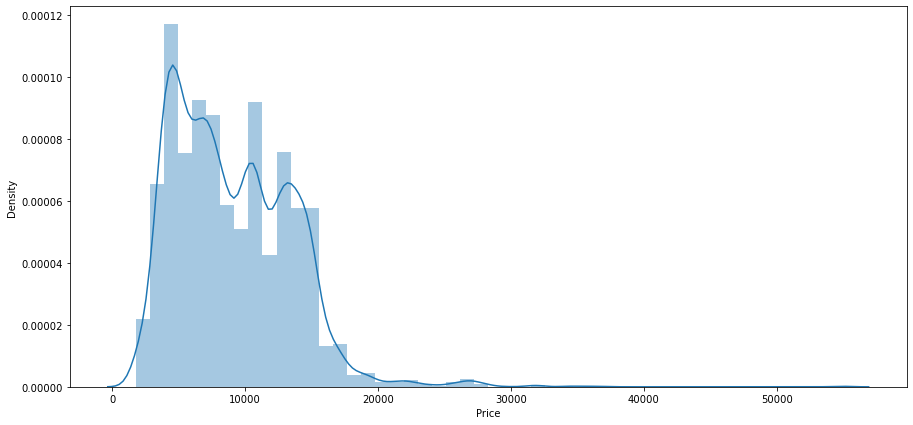

In [319]:
#let's analyze our dependent variable
sns.distplot(df['Price'])

#### Outlier Removal

In [320]:
#let's remove some outlier's from the dependent column
df['Price'].describe()

count    10676.000000
mean      9059.523604
std       4455.255817
min       1759.000000
25%       5276.750000
50%       8372.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64

In [321]:
len(df[df['Price']>20000])

142

In [322]:
df.shape

(10676, 13)

In [323]:
df = df[df['Price']<20000]

In [324]:
df.shape

(10534, 13)

C:\Users\fistum graceful\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

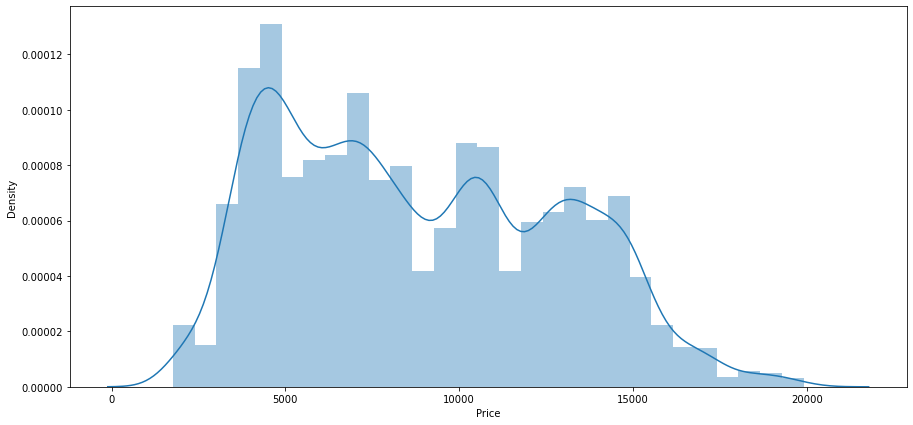

In [325]:
sns.distplot(df['Price'])

#### Let's Handle Our Categorical Data

In [326]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)
Source = pd.get_dummies(df['Source'], drop_first= True)
Destination = pd.get_dummies(df['Destination'], drop_first = True)
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [327]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [328]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### FEATURE SCALING

The Machine Learning algorithms that require the feature scaling are mostly KNN (K-Nearest Neighbours), Neural Networks, 
Linear Regression, and Logistic Regression.

The machine learning algorithms that do not require feature scaling is mostly non-linear ML algorithms such as Decision trees, 
Random Forest, AdaBoost, Naïve Bayes, etc.

##### on these project i'm using non-linear ml algoritms so we don't need to scale it

### Build a Model 

In [329]:
x = df.drop('Price', axis=1)
y= df['Price']

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

In [331]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Fitting model using Random Forest

In [332]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [334]:
y_pred = rf.predict(x_test)

In [335]:
rf.score(x_test,y_test)

0.8164433043710033

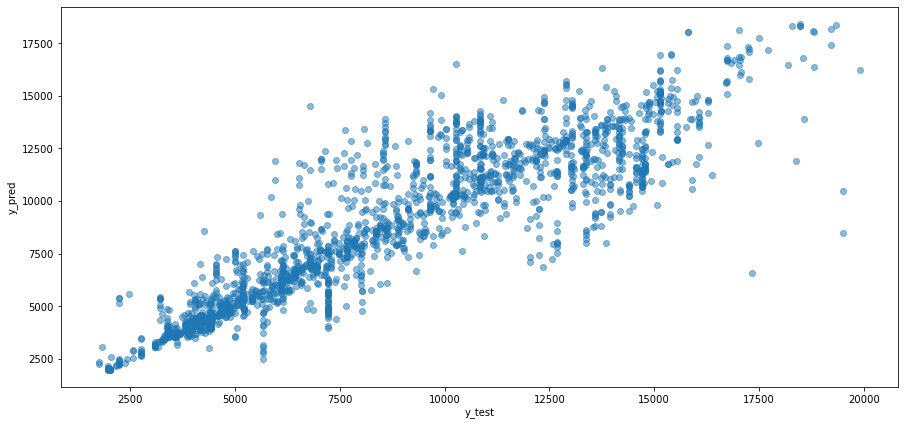

In [337]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [338]:
from sklearn import metrics

In [339]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1102.0250518519606
MSE: 2928220.6840257766
RMSE: 1711.204454185933


### Hyperparameter Tuning

In [351]:
#Choose following method for hyperparameter tuning
#    RandomizedSearchCV --> Fast
#    GridSearchCV
#Assign hyperparameters in form of dictionery
#Fit the model
#Check best paramters and best score

In [352]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [353]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [357]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,random_state=42,n_jobs=1)

In [358]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [359]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [360]:
prediction = rf_random.predict(x_test)

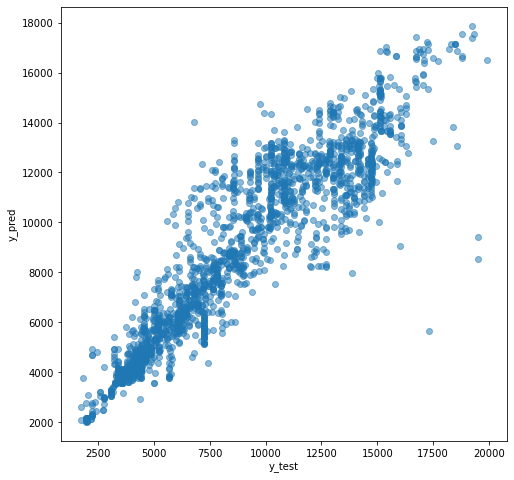

In [361]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [362]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1050.6747618109332
MSE: 2378584.147574825
RMSE: 1542.2659133803177


In [363]:
#Save the model to reuse it again
import pickle
# open a file, where you ant to store the data
file = open('rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

#### we do the samething for the test data except the fitting part